In [1]:
import pickle
import numpy as np
import pandas as pd
import sys
import os

def read_pickle(fn):
    data_test = []
    with open(fn, 'rb') as handle:
        
        try:
            while True:
                data_test.append(pickle.load(handle))
        except EOFError:
            pass
    return data_test

pickle_fmt = '/storage/coda1/p-rbras6/0/njadidoleslam3/projects/stochsm/stage4_analysis/i_tr_fits/{month}.pickle'
data_all = []
for month in range(1,13):
    in_pickle = pickle_fmt.format(month = month)
    data = read_pickle(in_pickle)

    for d in data:
        data_all.extend(d)

# events_all = pd.DataFrame(data_all, columns=['grid_xy','year', 'month','tr', 'i', 'tb'])


In [2]:
fits = pd.DataFrame(data_all, columns=['depth', 'a', 'b', 'month', 'year'])

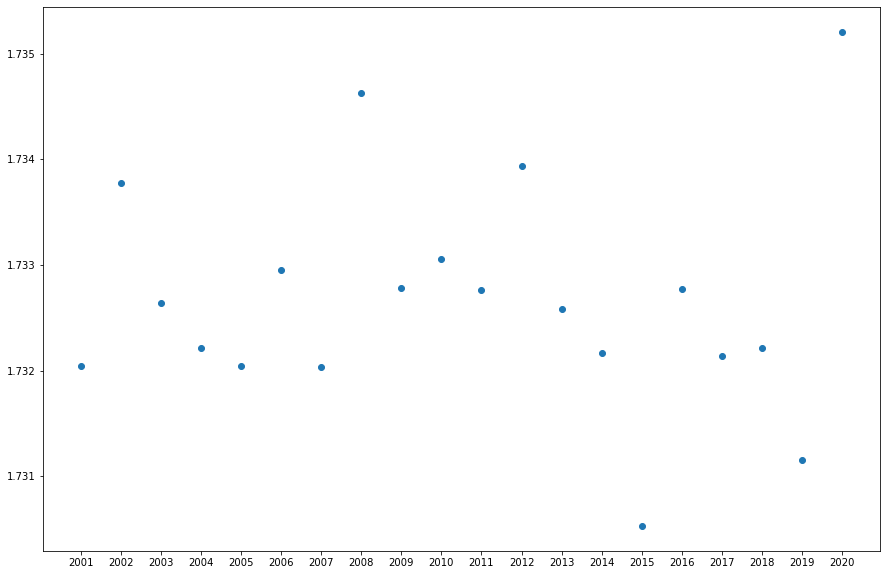

In [158]:
import matplotlib.pyplot as plt
idx = ((fits['depth']>=50) & (fits['depth']<60) & (fits['month']==6))
filtered = fits.loc[idx].sort_values(['year', 'month'])
fig,ax = plt.subplots(figsize = (15,10))
ax.scatter(filtered['year'], filtered['b'])
# ax.scatter(filtered['month'], filtered['b'])


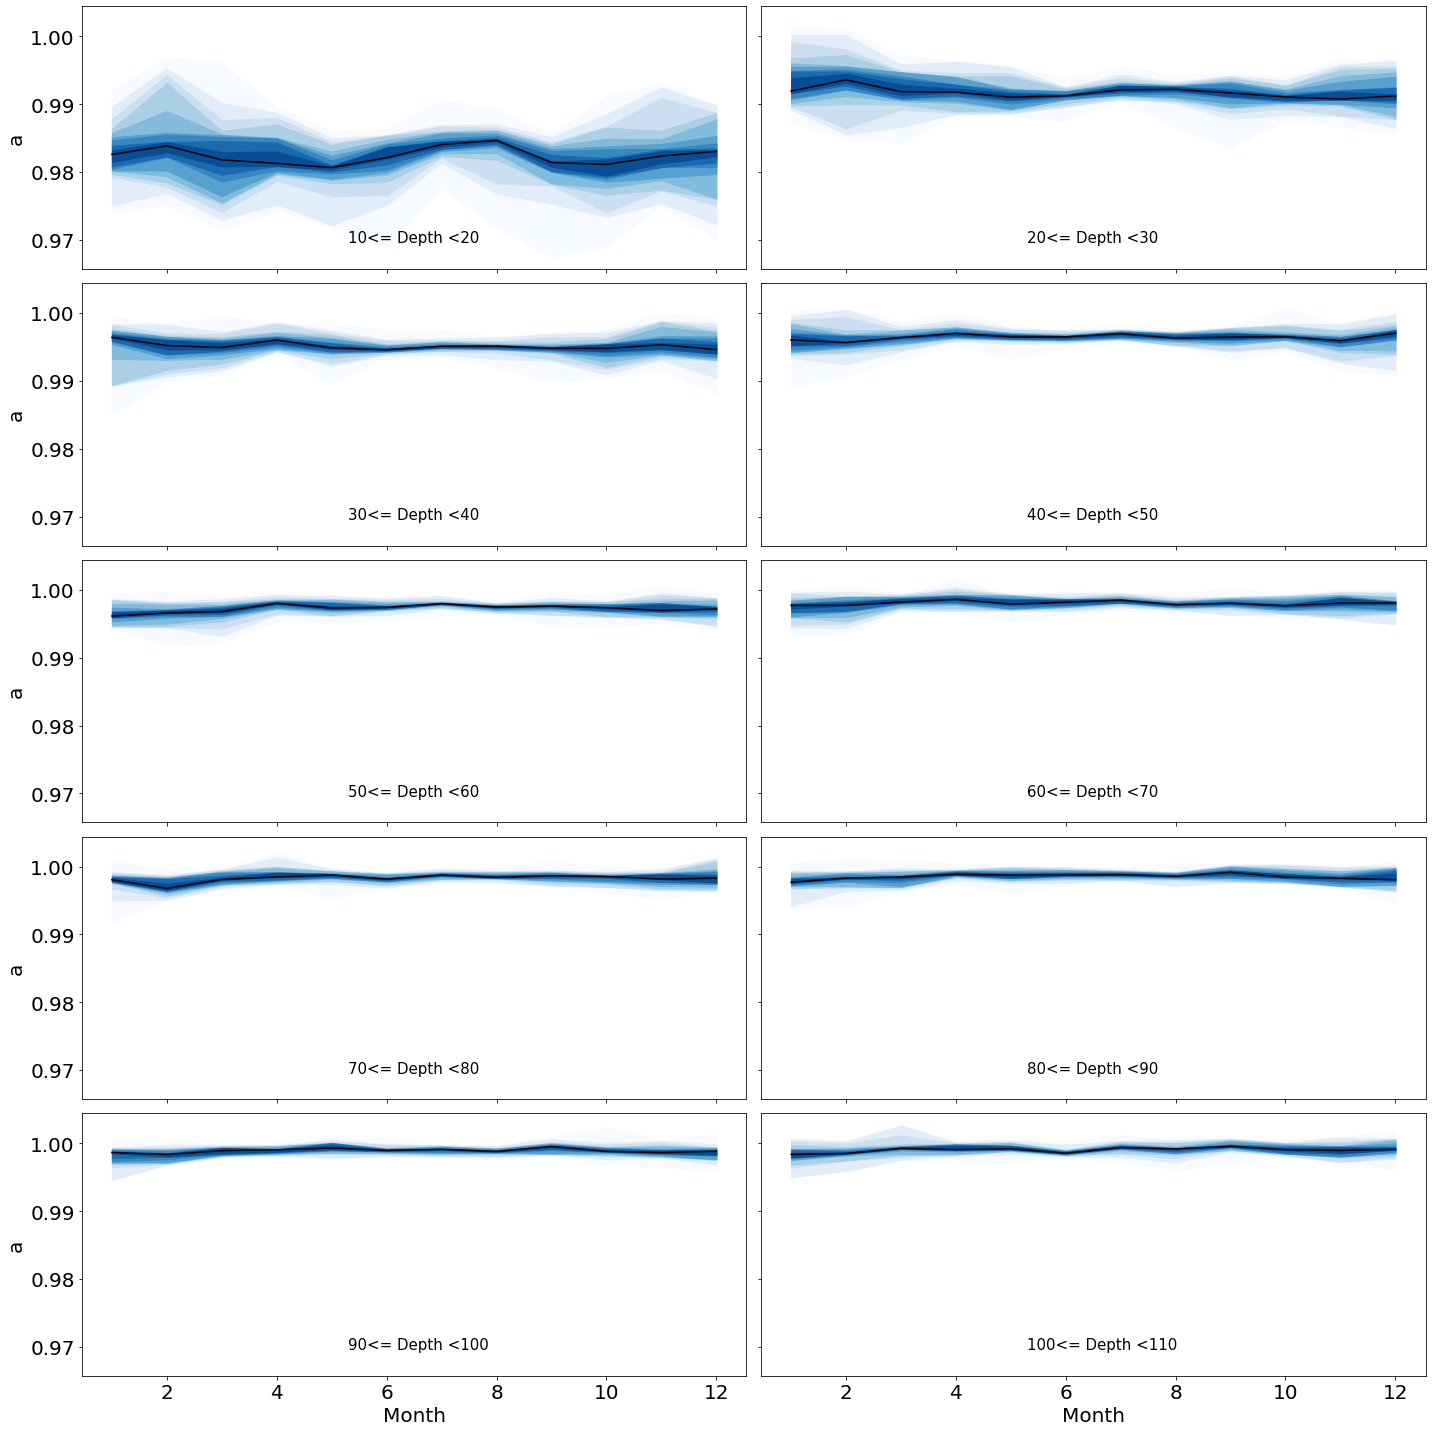

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
fig, ax1 = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True,figsize=(20,20))
for ii, depth in enumerate(np.arange(10, 110, 10)):
    
    i_ax = int(ii/2)
    j_ax = int(ii%2   )
    
    idx = ((fits['depth']>=depth) & (fits['depth']<depth+10))
    filtered = fits.loc[idx].sort_values(['year', 'month'])

    n = 20 # change this value for the number of iterations/percentiles
    colormap = cm.Blues # change this for the colormap of choice
    percentiles = np.linspace(0,100,n)

    SampleData=12*np.random.random_sample((12, 50))+12
    SDist=np.zeros((12,n))
    for i in range(n):
        for t in range(0,12):
            SDist[t,i]=np.percentile(filtered['a'].loc[filtered['month']== t+1],percentiles[i])

    half = int((n-1)/2)


    ax1[i_ax,j_ax].plot(np.arange(1,13,1), SDist[:,half],color='k')
    for i in range(half):
        ax1[i_ax,j_ax].fill_between(np.arange(1,13,1), SDist[:,i],SDist[:,-(i+1)],color=colormap(i/half))

    # ax1[i_ax,j_ax].set_title(str(depth), fontsize=15)
    ax1[i_ax,j_ax].text(0.4, 0.1, str(depth) + '<= Depth <' + str(depth+10), fontsize=15, transform=ax1[i_ax,j_ax].transAxes)
    ax1[i_ax,j_ax].tick_params(labelsize=20)
ax1[4,0].set_xlabel('Month', fontsize=20)
ax1[4,1].set_xlabel('Month', fontsize=20)
for jj in range(0,5):
    ax1[jj,0].set_ylabel('a', fontsize=20)
    # ax1[i_ax,j_ax].set_ylim
fig.tight_layout()

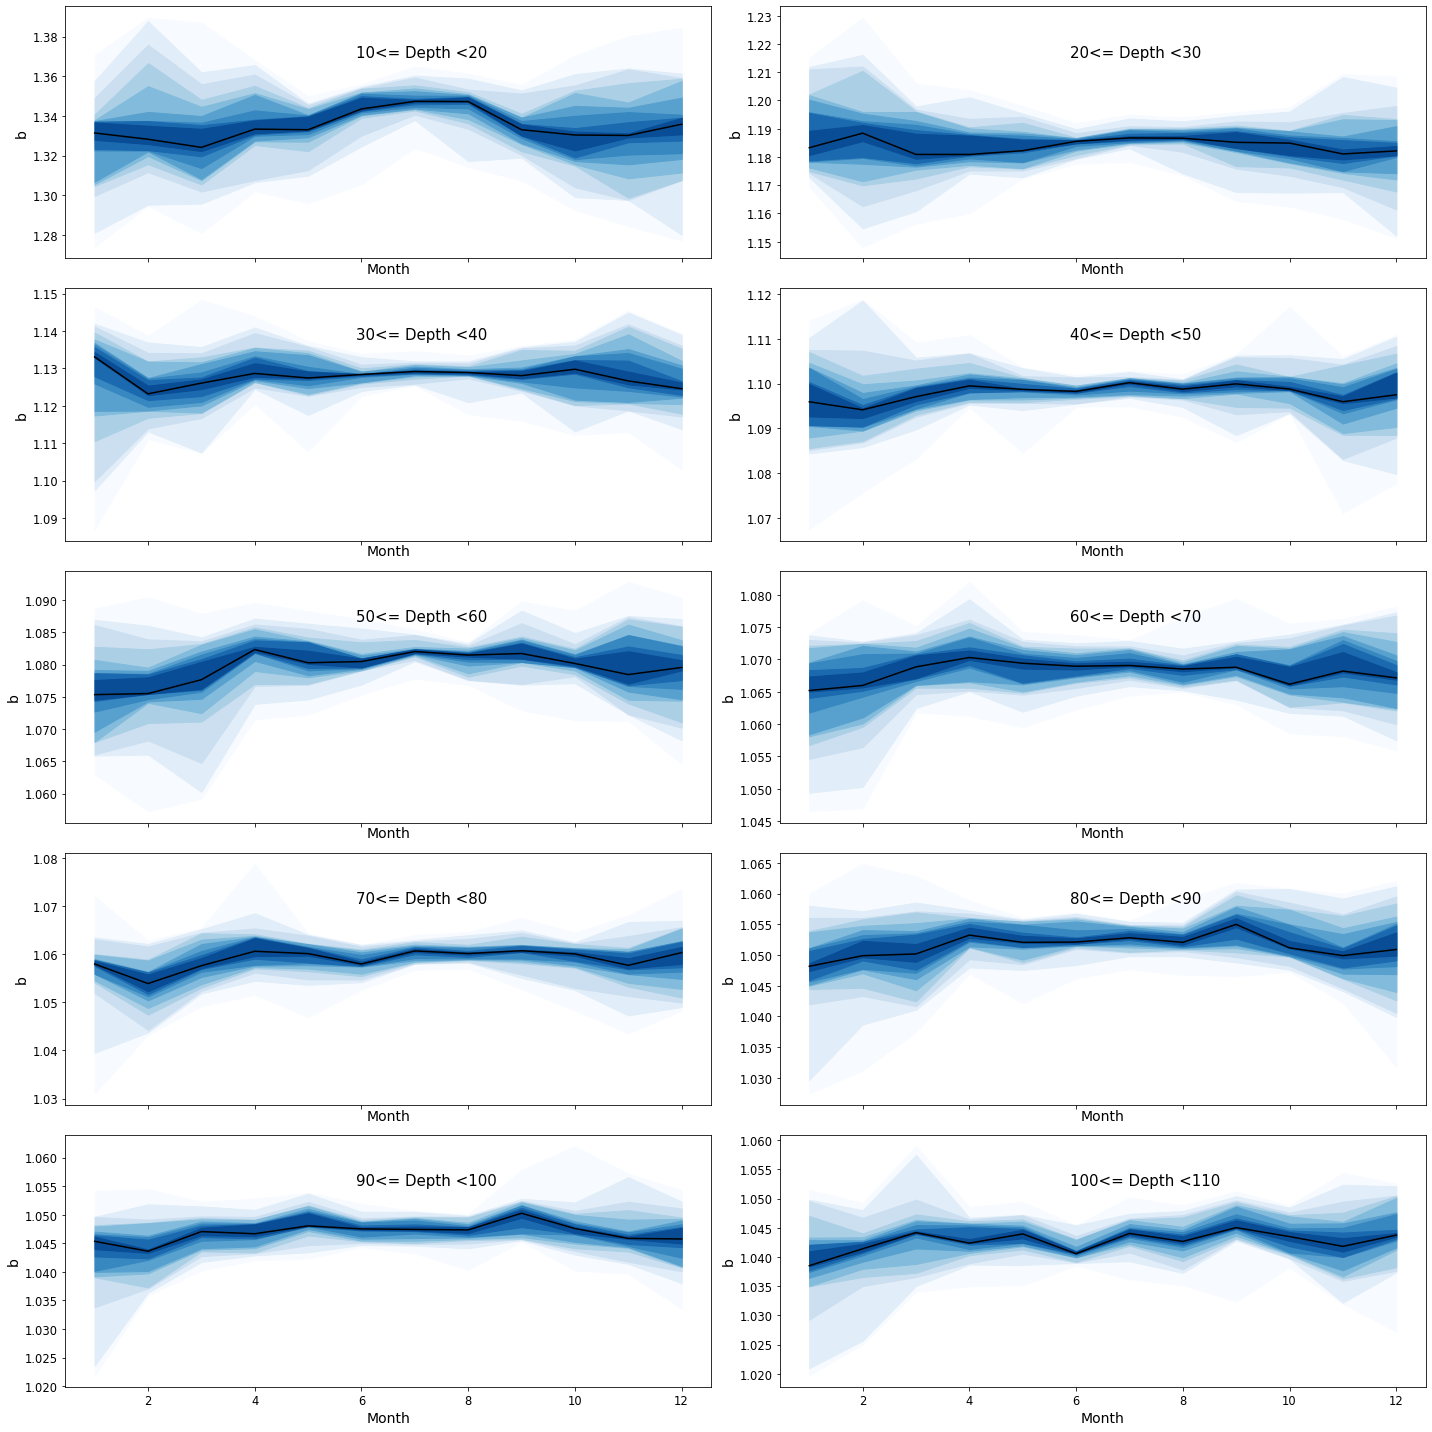

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
fig, ax1 = plt.subplots(nrows=5, ncols=2, sharex=True, figsize=(20,20))
for ii, depth in enumerate(np.arange(10, 110, 10)):
    
    i_ax = int(ii/2)
    j_ax = int(ii%2   )
    
    idx = ((fits['depth']>=depth) & (fits['depth']<depth+10))
    filtered = fits.loc[idx].sort_values(['year', 'month'])

    n = 20 # change this value for the number of iterations/percentiles
    colormap = cm.Blues # change this for the colormap of choice
    percentiles = np.linspace(0,100,n)

    SampleData=12*np.random.random_sample((12, 50))+12
    SDist=np.zeros((12,n))
    for i in range(n):
        for t in range(0,12):
            SDist[t,i]=np.percentile(np.power(10,filtered['b'].loc[filtered['month']== t+1])/depth,percentiles[i])

    half = int((n-1)/2)


    ax1[i_ax,j_ax].plot(np.arange(1,13,1), SDist[:,half],color='k')
    for i in range(half):
        ax1[i_ax,j_ax].fill_between(np.arange(1,13,1), SDist[:,i],SDist[:,-(i+1)],color=colormap(i/half))

    # ax1[i_ax,j_ax].set_title(str(depth), fontsize=15)
    ax1[i_ax,j_ax].text(0.45, 0.8, str(depth) + '<= Depth <' + str(depth+10), fontsize=15, transform=ax1[i_ax,j_ax].transAxes)
    ax1[i_ax,j_ax].tick_params(labelsize=11.5)
    ax1[i_ax,j_ax].set_xlabel('Month', fontsize=14)
    ax1[i_ax,j_ax].set_ylabel('b', fontsize=14)
    # ax1[i_ax,j_ax].set_ylim
fig.tight_layout()

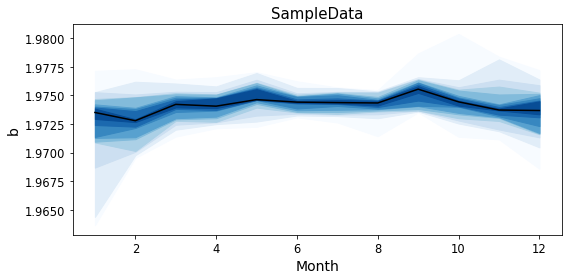

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

n = 20 # change this value for the number of iterations/percentiles
colormap = cm.Blues # change this for the colormap of choice
percentiles = np.linspace(0,100,n)

SampleData=12*np.random.random_sample((12, 50))+12
SDist=np.zeros((12,n))
for i in range(n):
    for t in range(0,12):
      SDist[t,i]=np.percentile(filtered['b'].loc[filtered['month']== t+1],percentiles[i])

half = int((n-1)/2)

fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(8,4))
ax1.plot(np.arange(1,13,1), SDist[:,half],color='k')
for i in range(half):
    ax1.fill_between(np.arange(1,13,1), SDist[:,i],SDist[:,-(i+1)],color=colormap(i/half))

ax1.set_title("SampleData", fontsize=15)
ax1.tick_params(labelsize=11.5)
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('b', fontsize=14)
fig.tight_layout()

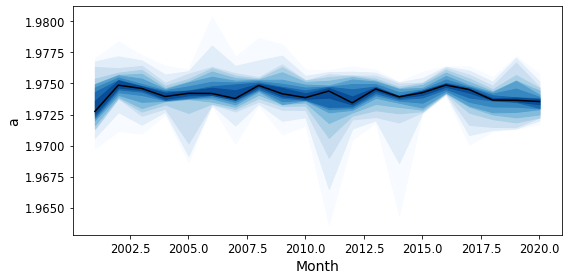

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

n = 20 # change this value for the number of iterations/percentiles
colormap = cm.Blues # change this for the colormap of choice
percentiles = np.linspace(0,100,n)

# SampleData=12*np.random.random_sample((12, 50))+12
SDist=np.zeros((20,n))
for i in range(n):
    for t in range(0,20):
      SDist[t,i]=np.percentile(filtered['b'].loc[filtered['year']== str(t+2001)],percentiles[i])

half = int((n-1)/2)

fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(8,4))
ax1.plot(np.arange(2001,2021,1), SDist[:,half],color='k')
for i in range(half):
    ax1.fill_between(np.arange(2001,2021,1), SDist[:,i],SDist[:,-(i+1)],color=colormap(i/half))

# ax1.set_title("SampleData", fontsize=15)
ax1.tick_params(labelsize=11.5)
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('a', fontsize=14)
fig.tight_layout()

In [86]:
filtered['year'].values

array(['2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001',
       '2001', '2001', '2001', '2001', '2002', '2002', '2002', '2002',
       '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002',
       '2003', '2003', '2003', '2003', '2003', '2003', '2003', '2003',
       '2003', '2003', '2004', '2004', '2004', '2004', '2004', '2004',
       '2004', '2004', '2004', '2004', '2004', '2005', '2005', '2005',
       '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005',
       '2005', '2006', '2006', '2006', '2006', '2006', '2006', '2006',
       '2006', '2006', '2006', '2006', '2006', '2007', '2007', '2007',
       '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007',
       '2007', '2008', '2008', '2008', '2008', '2008', '2008', '2008',
       '2008', '2008', '2008', '2008', '2008', '2009', '2009', '2009',
       '2009', '2009', '2009', '2009', '2009', '2009', '2009', '2009',
       '2009', '2010', '2010', '2010', '2010', '2010', '2010', '2010',
      

In [73]:
filtered

,depth,a,b,month,year
78,90,0.997389,1.971280,1,2001
338,90,0.996724,1.969769,2,2001
538,90,0.998371,1.974379,3,2001
728,90,0.999058,1.972131,4,2001
868,90,1.000481,1.977026,5,2001
...,...,...,...,...,...
1508,90,0.999244,1.974729,8,2020
1598,90,0.998127,1.973812,9,2020
1818,90,0.998234,1.973003,10,2020
2048,90,0.999539,1.975771,11,2020
